In [203]:
# importing requisite packages
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
import time
import pandas as pd
import numpy as np
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# # driver = webdriver.Chrome('/Users/frank/Desktop/OneDrive - purdue.edu/TA-Zheng Fang/MGMT590/lectures/chromedriver', options = chrome_options)
driver = webdriver.Chrome('chromedriver.exe', options = chrome_options)
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sys
import requests
import bs4


# Scraping Oscar Nominated Movies' Details From Rotten Tomatoes

In [93]:
# reading in the csv file
movie = pd.read_excel('movies_oscar.xlsx')

In [ ]:
movie = list(movie['movie'])

In [ ]:
# appending movie names to a static link
link_2 = []
for k in movie:
    link_2.append('https://www.rottentomatoes.com/m/'+k)

In [ ]:
#initializing lists
genre = []
run_time = []
studio = []
critics_base = []
audience_base = []
pg = []
mov=[]
user_score=[]

#iterating through links
for d in range(0,len(link_2)):
    try:
        if d==49:
            continue
        print(d)
        print(len(genre))
        driver.get(link_2[d])
        v = driver.find_elements_by_xpath('//span[@class="mop-ratings-wrap__percentage"]')
        user_score.append(v[1].text[:-1]) # collecting user score
        votes_baseline = driver.find_elements_by_xpath('//strong[@class="mop-ratings-wrap__text--small"]')
        audience_base.append(votes_baseline[1].text.split(':')[-1].strip(' ')) # collecting user votes
        critics_baseline = driver.find_elements_by_xpath('//small[@class="mop-ratings-wrap__text--small"]')
        critics_base.append(critics_baseline[0].text)# collecting critic votes
        details = driver.find_elements_by_xpath('//li[@class="meta-row clearfix"]')
        genre.append(details[1].text.split(' ')[-1])# collecting genre
        pg.append(details[0].text.split(':')[-1]) # collecting rating
        run_time.append(details[-2].text.split(':')[-1].split(' ')[1])  # collecting run time
        studio.append(details[-1].text.split(':')[-1].strip(' ')) #collecting studio
        mov.append(movie[d]) #appending movie name
    except:
        pass
for g in range(0,len(run_time)): # converting run time to integer
    run_time[g] = int(run_time[g])


In [ ]:
# converting to dataframe
oscar = pd.DataFrame({'movie':mov,'Genre':genre,'Audience_votes':audience_base,
                              'Critics_votes':critics_base,'rating':pg,'Run_time':run_time,'studio':studio,
                              'user_score':user_score)

In [ ]:
# exporting to a csv file
oscar.to_csv('Oscar_Details.csv')

# Delving Deeper Into The Genres of Oscar Nominated Movies

In [ ]:
# reading in the csv file
mov = pd.read_excel('movies_oscar.xlsx')

In [ ]:
 mov = list(mov['Movies'])

In [ ]:
# appending movie names to google search phrases
mov_wiki = []
for i in mov:
    mov_wiki.append(i+' film wiki')
    

In [ ]:
# Deep dive into genres
genre_spec = []
for i in mov_wiki:
    try:
        driver = webdriver.Chrome('chromedriver.exe', options = chrome_options)
        driver.get('https://www.google.com') # accessing wikipedia through google
        search = driver.find_element_by_name('q')
        search.send_keys(i)
        time.sleep(9)
        nex = driver.find_element_by_xpath("//input[@value='Google Search']")
        print(nex)
        nex.click()
        nex_1 = driver.find_element_by_xpath("//span[@class='S3Uucc']")
        nex_1.click()
        nex_2 = driver.find_elements_by_xpath("//a[contains(@href,'https')]")
        wiki_link = nex_2[10].get_attribute('href')
        driver.get(wiki_link)
        res = requests.get(wiki_link)
        print(wiki_link)
        time.sleep(7)
        wiki = bs4.BeautifulSoup(res.text,'html.parser')
        # collecting the first paragraph of the wikipdedia page
        if wiki.select('p')[0].getText()[0:1]=='\n':
            genre_spec.append(wiki.select('p')[1].getText())
        else:
            genre_spec.append(wiki.select('p')[0].getText())
        print(genre_spec)
        driver.quit()
    except:
        driver.quit()

In [ ]:
len(genre_spec)
gen = genre_spec.copy()

In [ ]:
# cleaning the text, removing nouns
pattern = '[A-Z]{1}[a-z]*'
for i in range(0, len(gen)):
    gen[i] = re.sub(pattern,'',gen[i])
    gen[i] = gen[i].replace('  ',' ')
    gen[i] = re.sub('\\b[0-9]+\\b','',gen[i])
    gen[i] = re.sub('[^\w\s]','',gen[i])
    gen[i] = gen[i].replace('\n','')

In [ ]:
# converting to a single body of text

text = " ".join(review for review in gen)

In [ ]:
#writing to a csv file
r = open('wordcloud.csv','w')
r.write(text)
r.close()

## Reading in the Wordcloud.csv file

In [270]:
#reading in the wordcloud.csv file that has synopsis of each Oscar Nominated movie
text = pd.read_csv('wordcloud.csv',encoding='latin-1')

In [273]:
#converting to a string
text = str(text)

In [271]:
# updating the stopwords 
stopwords.update(['Full','review','film','movie','will','yet','still','Spanish','one','take','may',
                  'something','even','without','much','well','us','made','people','see','way','look','make',
                 'one','two','three','four','seem','might','though','place','find','work','give','many','bring',
                 'directed','written','star','follows','story','produced','supporting','plot','year','starring',
                 'first','stars','role','based','roles','try','later','early','period','young','brother','name',
                 'interviews','day','town','fourth','million','depict','tells','final','series','following','singer',
                 'life','discover','series','yearold','production','original','premiered','set','relationship',
                 'lead','coproduction','took','release','shot','screenplay','state','feature','served',
                 'world','centers','because','depicts','sets','second','coproduced','directorial''grossed','features',
                 'entrusted','loosely','worldwide','picked','debut','budget','third','outide','filmed','fall',
                 'former','plays','limited'])

In [274]:
#generating the wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=300,width=800, height=400).generate(text)

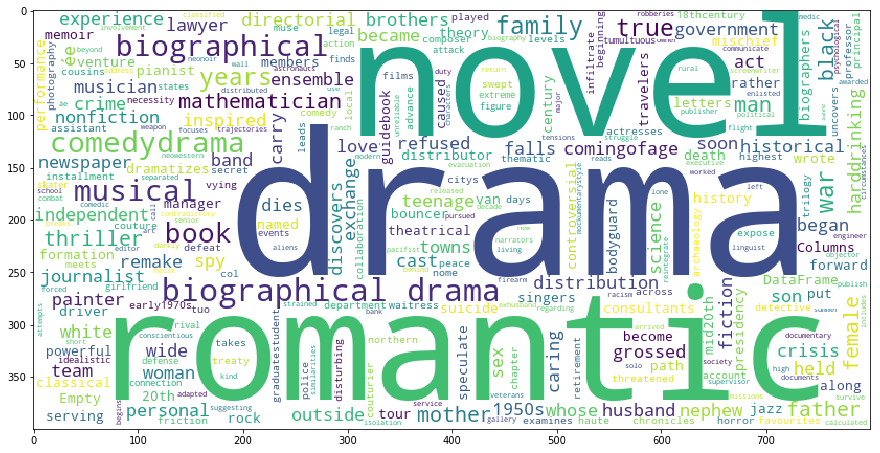

In [275]:
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# plt.show()

# Scraping Critics' Reviews for all Movies

In [ ]:
#reading in the file
movie = pd.read_excel('movies.xlsx')

In [ ]:
movie = list(movie['movie'])

In [ ]:
#appending the movie names to the Rotten Tomatoes static link
l =[]
for j in range(0,len(movie)):
    l.append('https://www.rottentomatoes.com/m/'+movie[j]+'/reviews')

In [ ]:
#initializing the lists
prev=''
f=1
rev=[]
rate = []
movie_name = []
count=0
for b in range(0,len(l)):
    driver.get(l[b])
    print('Movie count:',b)
    print('Movie name:',l[b])
    print(len(rev))
    print(movie_name)
    while f==1:

        reviews = driver.find_elements_by_xpath("//div[@class='the_review']")
        for i in range(0, len(reviews)):
            rev.append(reviews[i].text) # collecting the reviews
            movie_name.append(movie[b]) #appending the movie name
        rating = driver.find_elements_by_xpath("//*[contains(@class,'review_icon icon')]")

        for j in range(0, len(rating)):
            if rating[j].get_attribute('class').split(' ')[-1]=='fresh':
                rate.append('positive') # collecting sentiment
            else:
                rate.append('negative')  #collecting sentiment
        
        #pagination
        try:
            if bool(driver.find_elements_by_xpath("//span[@class='glyphicon glyphicon-chevron-right']/parent::a")):
                page = driver.find_elements_by_xpath("//span[@class='glyphicon glyphicon-chevron-right']/parent::a")
                lin = page[1].get_attribute('href')
                if lin==prev:
                    prev=''
                    break
                prev = lin
                driver.get(lin)
            else:
                f=0

        except:
            f=0

In [ ]:
#pushing data into a dataframe
Rotten_Tomatoes_critic = pd.DataFrame({'movie':movie_name,'Reviews':rev,'Sentiment':rate})

In [ ]:
#exporting to a csv file
Rotten_Tomatoes_critic.to_csv('Full_critic_reviews.csv')

# Are There Any Insights In The Critics' Reviews?

## Analysis of Critics' Positive Reviews

In [194]:
#reading in the csv file
df = pd.read_csv('Critics_reviews.csv')

#dropping NAs from the dataframe
df = df.dropna()

# #dropping the extra column
# df.drop('Unnamed: 0',inplace=True, axis=1)

#dropping duplicates
df.drop_duplicates(inplace=True)

#removing digits
patterndigits = '\\b[0-9]+\\b'
df['Reviews'] = df['Reviews'].str.replace(patterndigits,'')

#removing punctuation marks
patternpunc = '[^\w\s]'
df['Reviews'] =  df['Reviews'].str.replace(patternpunc,'')

#removing nouns
pattern_names = '[A-Z]{1}[a-z]*'
df['Reviews'] = df['Reviews'].str.replace(pattern_names,'')

#filtering positive sentiment
reviews = df[df['Sentiment']=='positive']['Reviews']

#converting to text
text = " ".join(review for review in reviews)

#stopwords initializing
stopwords = set(STOPWORDS)

In [224]:
#updating stopwords
stopwords.update(['Full','review','film','movie','will','yet','still','Spanish','one','take','may',
                  'something','even','without','much','well','us','made','people','see','way','look','make',
                 'one','two','three','four','seem','might','though','place','find','work','give','many','bring',
                 'Full','review','film','movie','will','yet','still','Spanish','one','take','may',
                  'something','even','without','much','well','us','made','people','see','way','look','make',
                 'one','two','three','four','seem','might','though','place','find','work','give','many','bring',
                 'directed','written','star','follows','story','produced','supporting','plot','year','starring',
                 'first','stars','role','based','roles','try','later','early','period','young','brother','name',
                 'interviews','day','town','fourth','million','depict','tells','final','series','following','singer',
                 'life','discover','series','yearold','production','original','premiered','set','relationship',
                 'lead','coproduction','took','release','shot','screenplay','state','feature','served',
                 'world','centers','because','depicts','sets','second','coproduced','directorial''grossed','features',
                 'entrusted','loosely','worldwide','picked','debut','budget','third','outide','filmed','fall',
                 'former','plays','limited'])

In [225]:
#generating wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

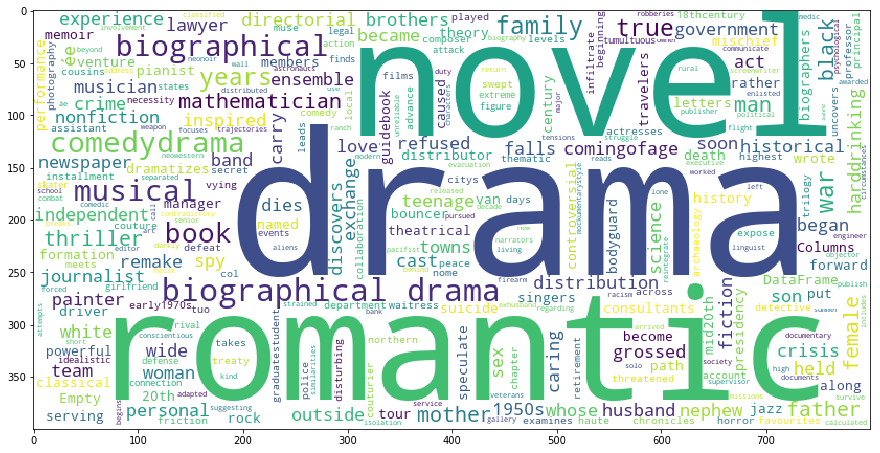

In [276]:
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud)

## Analysis of Critics' Negative Reviews for Oscar Nominated Movies

In [233]:
#filtering negative sentiment
reviews = df[df['Sentiment']=='negative']['Reviews']

In [234]:
#converting to text
text = " ".join(review for review in reviews)

In [ ]:
#initializing the stopwords
stopwords = set(STOPWORDS)

In [ ]:
#stopwords update
stopwords.update(['Full','review','film','movie','will','yet','still','Spanish','one','take','may',
                  'something','even','without','much','well','us','made','people','see','way','look','make',
                 'one','two','three','four','seem','might','though','place','find','work','give','many','bring'])

In [235]:
#generating wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

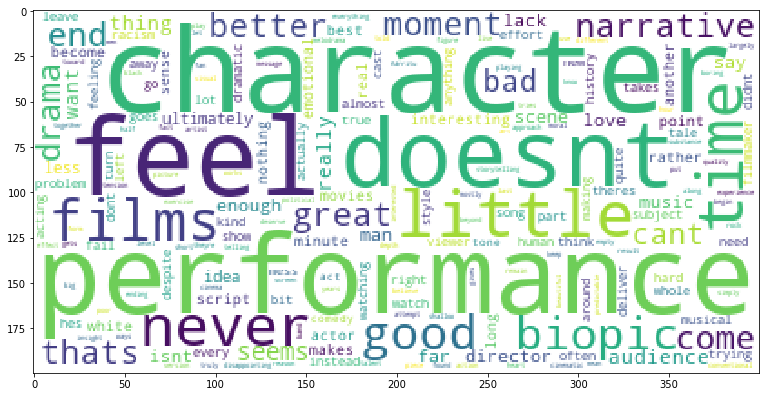

In [236]:
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.figure( figsize=(13,10) )
plt.imshow(wordcloud)

# Scraping Users' Reviews

In [ ]:
#reading in all the movies
movie = pd.read_excel('movies.xlsx')

movie = list(movie['movie'])

#appending movie names to links
link_1=[]
for j in movie:
    link_1.append('https://www.rottentomatoes.com/m/'+j+'/reviews?type=user')


In [ ]:
#initializing the lists
text = []
sent = []
f=1
points=[]
movie_name=[]
error= []
for b in range(0, len(link_1)):
    print('Movie count:',b)
    print('Movie name:',link_1[b])
    print('parity:',len(text),len(sent),len(movie_name))
    driver = webdriver.Chrome('chromedriver.exe', options = chrome_options)
    driver.get(link_1[b])
    time.sleep(2)
    #checking if pages have no data
    try:
        if (driver.find_element_by_xpath('//h1').text =='404 - NOT FOUND'):
            error.append(movie[i])
            time.sleep(2)
            continue
    except:
        pass
    
    f=1
    count = 0
    #iterating through all the links
    while (f==1) & (count<=40):
        try:
            revi = driver.find_elements_by_xpath("//p[@class='audience-reviews__review js-review-text clamp clamp-8 js-clamp']")
            time.sleep(1)
            for h in range(0, len(revi)):
                text.append(revi[h].text) #collecting user reviews
                movie_name.append(movie[b]) #appending movie names
                count+=1
            star = driver.find_elements_by_xpath("//span[@class='star-display']")
            #scraping the star rating of each review
            for i in range(0, len(star)):
                rat = star[i].find_elements_by_xpath('child::span')
                for k in range(0,len(rat)):

                    if ((rat[k].get_attribute('class').split('__')[-1])=='filled '):
                        points.append(1)
                    elif ((rat[k].get_attribute('class').split('__')[-1])=='empty'):
                        points.append(0)
                    else:
                        points.append(0.5) 
                
                # reviews greater than positive is positive
                if (sum(points) >= 3.5):
                    sent.append('positive')
                else:  #else negative
                    sent.append('negative')

                points=[]
            try:
                if driver.find_elements_by_xpath('//span[@class="prev-next-paging__button-text"]')[1].text=='NEXT':
                    t = driver.find_elements_by_xpath('//span[@class="prev-next-paging__button-text"]')[1].click()
                    time.sleep(2)
                else:
                    f=0
            except:
                f=0
        except:
            pass
        
    driver.close() 

In [ ]:
#pushing data into dataframe
user_reviews = pd.DataFrame({'Movie':movie_name,'Text':text,'Sentiment':sent})

In [ ]:
#exporting to a csv file
user_reviews.to_csv('all_user_reviews.csv')

# Analyzing User Reviews' Positive Sentiment for Oscar Nominated Movies


## Positive Sentiment

In [262]:
# reading in the csv file
user = pd.read_csv('User_reviews.csv')

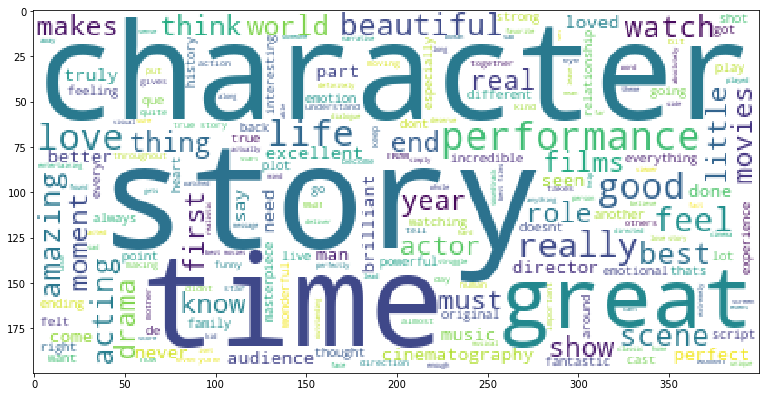

In [268]:
#dropping null values
user = user.dropna()

#dropping duplicates
user.drop_duplicates(inplace=True)

##removing digits
patterndigits = '\\b[0-9]+\\b'
user['Text'] = user['Text'].str.replace(patterndigits,'')

#removing punctuation marks
patternpunc = '[^\w\s]'
user['Text'] =  user['Text'].str.replace(patternpunc,'')

#removing names
pattern_names = '[A-Z]{1}[a-z]*'
user['Text'] = user['Text'].str.replace(pattern_names,'')

#collecting positive user reviews
reviews = user[user['Sentiment']=='positive']['Text']

#converting reviews to text
text = " ".join(review for review in reviews)


#initializing stopwords
stopwords = set(STOPWORDS)

#updating stopwords
stopwords.update(['Full','review','film','movie','will','yet','still','Spanish','one','take','may',
                  'something','even','without','much','well','us','made','people','see','way','look','make',
                 'one','two','three','four','seem','might','though','place','find','work','give','many','bring'])

#generating wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#plotting the wordcloud
plt.figure( figsize=(13,10) )
plt.imshow(wordcloud)

## Negative Sentiment


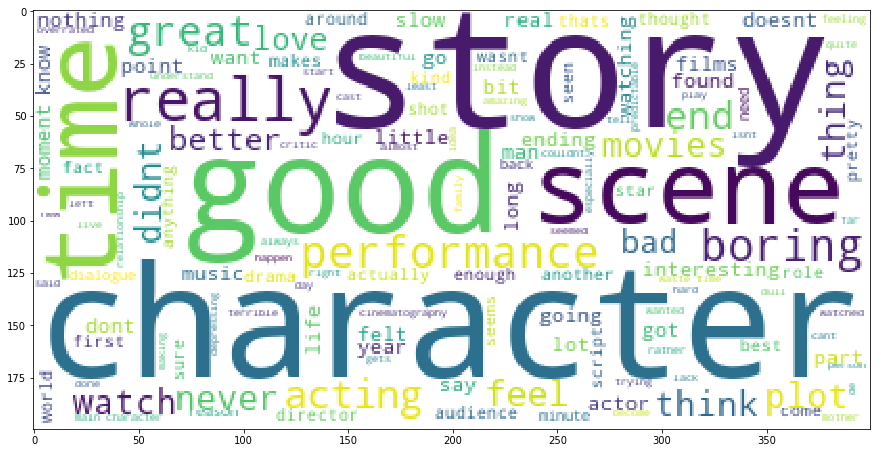

In [327]:
#dropping null values
user = user.dropna()


#dropping duplicates
user.drop_duplicates(inplace=True)

##removing digits
patterndigits = '\\b[0-9]+\\b'
user['Text'] = user['Text'].str.replace(patterndigits,'')


#removing punctuation marks
patternpunc = '[^\w\s]'
user['Text'] =  user['Text'].str.replace(patternpunc,'')

#removing names
pattern_names = '[A-Z]{1}[a-z]*'
user['Text'] = user['Text'].str.replace(pattern_names,'')

#collecting negative user reviews
reviews = user[user['Sentiment']=='negative']['Text']


#converting reviews to text
text = " ".join(review for review in reviews)

#initializing stopwords
stopwords = set(STOPWORDS)



#updating stopwords
stopwords.update(['Full','review','film','movie','will','yet','still','Spanish','one','take','may',
                  'something','even','without','much','well','us','made','people','see','way','look','make',
                 'one','two','three','four','seem','might','though','place','find','work','give','many','bring'])



#generating wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)



#plotting the wordcloud
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud)

# NLP on Critics' Reviews

## Building the model

In [97]:
#importing the string package and the stopwords
import string
stopwords_list = stopwords.words('english') + list(string.punctuation)

In [98]:
#importing the training data
train = pd.read_csv('rotten_tomatoes_reviews.csv')

#converting sentiment to binary values: 1 and 0
train['Sentiment'] = np.where((train['Sentiment']=='Rotten'),0,1)
#dropping na values
train.dropna(inplace=True)

#dropping duplicates
train.drop_duplicates(inplace=True)

#initializing training data
training_data = []
reviews = list(train.Review)
true_sentiment = list(train.Sentiment)

import string
stopwords_list = stopwords.words('english') + list(string.punctuation)

#tokenizing the reviews and appending to the training data
for i in range(0,len(reviews)):
    print(i)
    word_list = word_tokenize(reviews[i])
    word_list = [word for word in word_list if word.lower() not in stopwords_list]
    word_dictionary = dict([(word, True) for word in word_list])
    sample_tuple = (word_dictionary,true_sentiment[i])
    training_data.append(sample_tuple)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380


4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418


5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153


7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093


9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9756
9757
9758
9759
9760
9761
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914


11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
1149

13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
1351

15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
15159
15160
15161
15162
15163
15164
15165
15166
15167
15168
15169
15170
15171
15172
15173
15174
15175
15176
15177
15178
15179
15180
15181
15182
15183
15184
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
1521

16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
16598
16599
16600
16601
16602
16603
16604
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16630
16631
16632
16633
16634
16635
16636
16637
16638
16639
16640
16641
16642
16643
16644
16645
16646
16647
16648
16649
16650
16651
16652
16653
16654
16655
16656
16657
16658
16659
16660
16661
16662
16663
16664
16665
16666
16667
16668
16669
16670
16671
16672
1667

18203
18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
18224
18225
18226
18227
18228
18229
18230
18231
18232
18233
18234
18235
18236
18237
18238
18239
18240
18241
18242
18243
18244
18245
18246
18247
18248
18249
18250
18251
18252
18253
18254
18255
18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
1836

19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
1988

21267
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
2143

22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
2293

24764
24765
24766
24767
24768
24769
24770
24771
24772
24773
24774
24775
24776
24777
24778
24779
24780
24781
24782
24783
24784
24785
24786
24787
24788
24789
24790
24791
24792
24793
24794
24795
24796
24797
24798
24799
24800
24801
24802
24803
24804
24805
24806
24807
24808
24809
24810
24811
24812
24813
24814
24815
24816
24817
24818
24819
24820
24821
24822
24823
24824
24825
24826
24827
24828
24829
24830
24831
24832
24833
24834
24835
24836
24837
24838
24839
24840
24841
24842
24843
24844
24845
24846
24847
24848
24849
24850
24851
24852
24853
24854
24855
24856
24857
24858
24859
24860
24861
24862
24863
24864
24865
24866
24867
24868
24869
24870
24871
24872
24873
24874
24875
24876
24877
24878
24879
24880
24881
24882
24883
24884
24885
24886
24887
24888
24889
24890
24891
24892
24893
24894
24895
24896
24897
24898
24899
24900
24901
24902
24903
24904
24905
24906
24907
24908
24909
24910
24911
24912
24913
24914
24915
24916
24917
24918
24919
24920
24921
24922
24923
24924
24925
24926
24927
24928
24929
2493

26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
2673

28219
28220
28221
28222
28223
28224
28225
28226
28227
28228
28229
28230
28231
28232
28233
28234
28235
28236
28237
28238
28239
28240
28241
28242
28243
28244
28245
28246
28247
28248
28249
28250
28251
28252
28253
28254
28255
28256
28257
28258
28259
28260
28261
28262
28263
28264
28265
28266
28267
28268
28269
28270
28271
28272
28273
28274
28275
28276
28277
28278
28279
28280
28281
28282
28283
28284
28285
28286
28287
28288
28289
28290
28291
28292
28293
28294
28295
28296
28297
28298
28299
28300
28301
28302
28303
28304
28305
28306
28307
28308
28309
28310
28311
28312
28313
28314
28315
28316
28317
28318
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
2838

30132
30133
30134
30135
30136
30137
30138
30139
30140
30141
30142
30143
30144
30145
30146
30147
30148
30149
30150
30151
30152
30153
30154
30155
30156
30157
30158
30159
30160
30161
30162
30163
30164
30165
30166
30167
30168
30169
30170
30171
30172
30173
30174
30175
30176
30177
30178
30179
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
30191
30192
30193
30194
30195
30196
30197
30198
30199
30200
30201
30202
30203
30204
30205
30206
30207
30208
30209
30210
30211
30212
30213
30214
30215
30216
30217
30218
30219
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30249
30250
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30267
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
30292
30293
30294
30295
30296
30297
3029

31758
31759
31760
31761
31762
31763
31764
31765
31766
31767
31768
31769
31770
31771
31772
31773
31774
31775
31776
31777
31778
31779
31780
31781
31782
31783
31784
31785
31786
31787
31788
31789
31790
31791
31792
31793
31794
31795
31796
31797
31798
31799
31800
31801
31802
31803
31804
31805
31806
31807
31808
31809
31810
31811
31812
31813
31814
31815
31816
31817
31818
31819
31820
31821
31822
31823
31824
31825
31826
31827
31828
31829
31830
31831
31832
31833
31834
31835
31836
31837
31838
31839
31840
31841
31842
31843
31844
31845
31846
31847
31848
31849
31850
31851
31852
31853
31854
31855
31856
31857
31858
31859
31860
31861
31862
31863
31864
31865
31866
31867
31868
31869
31870
31871
31872
31873
31874
31875
31876
31877
31878
31879
31880
31881
31882
31883
31884
31885
31886
31887
31888
31889
31890
31891
31892
31893
31894
31895
31896
31897
31898
31899
31900
31901
31902
31903
31904
31905
31906
31907
31908
31909
31910
31911
31912
31913
31914
31915
31916
31917
31918
31919
31920
31921
31922
31923
3192

33176
33177
33178
33179
33180
33181
33182
33183
33184
33185
33186
33187
33188
33189
33190
33191
33192
33193
33194
33195
33196
33197
33198
33199
33200
33201
33202
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33215
33216
33217
33218
33219
33220
33221
33222
33223
33224
33225
33226
33227
33228
33229
33230
33231
33232
33233
33234
33235
33236
33237
33238
33239
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33252
33253
33254
33255
33256
33257
33258
33259
33260
33261
33262
33263
33264
33265
33266
33267
33268
33269
33270
33271
33272
33273
33274
33275
33276
33277
33278
33279
33280
33281
33282
33283
33284
33285
33286
33287
33288
33289
33290
33291
33292
33293
33294
33295
33296
33297
33298
33299
33300
33301
33302
33303
33304
33305
33306
33307
33308
33309
33310
33311
33312
33313
33314
33315
33316
33317
33318
33319
33320
33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33334
33335
33336
33337
33338
33339
33340
33341
3334

34610
34611
34612
34613
34614
34615
34616
34617
34618
34619
34620
34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34631
34632
34633
34634
34635
34636
34637
34638
34639
34640
34641
34642
34643
34644
34645
34646
34647
34648
34649
34650
34651
34652
34653
34654
34655
34656
34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34679
34680
34681
34682
34683
34684
34685
34686
34687
34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34715
34716
34717
34718
34719
34720
34721
34722
34723
34724
34725
34726
34727
34728
34729
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
3477

36046
36047
36048
36049
36050
36051
36052
36053
36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
3621

37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627
37628
37629
37630
37631
37632
37633
37634
37635
37636
37637
37638
37639
37640
37641
37642
37643
3764

39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
39629
39630
39631
39632
39633
39634
39635
39636
39637
39638
39639
3964

40871
40872
40873
40874
40875
40876
40877
40878
40879
40880
40881
40882
40883
40884
40885
40886
40887
40888
40889
40890
40891
40892
40893
40894
40895
40896
40897
40898
40899
40900
40901
40902
40903
40904
40905
40906
40907
40908
40909
40910
40911
40912
40913
40914
40915
40916
40917
40918
40919
40920
40921
40922
40923
40924
40925
40926
40927
40928
40929
40930
40931
40932
40933
40934
40935
40936
40937
40938
40939
40940
40941
40942
40943
40944
40945
40946
40947
40948
40949
40950
40951
40952
40953
40954
40955
40956
40957
40958
40959
40960
40961
40962
40963
40964
40965
40966
40967
40968
40969
40970
40971
40972
40973
40974
40975
40976
40977
40978
40979
40980
40981
40982
40983
40984
40985
40986
40987
40988
40989
40990
40991
40992
40993
40994
40995
40996
40997
40998
40999
41000
41001
41002
41003
41004
41005
41006
41007
41008
41009
41010
41011
41012
41013
41014
41015
41016
41017
41018
41019
41020
41021
41022
41023
41024
41025
41026
41027
41028
41029
41030
41031
41032
41033
41034
41035
41036
4103

42401
42402
42403
42404
42405
42406
42407
42408
42409
42410
42411
42412
42413
42414
42415
42416
42417
42418
42419
42420
42421
42422
42423
42424
42425
42426
42427
42428
42429
42430
42431
42432
42433
42434
42435
42436
42437
42438
42439
42440
42441
42442
42443
42444
42445
42446
42447
42448
42449
42450
42451
42452
42453
42454
42455
42456
42457
42458
42459
42460
42461
42462
42463
42464
42465
42466
42467
42468
42469
42470
42471
42472
42473
42474
42475
42476
42477
42478
42479
42480
42481
42482
42483
42484
42485
42486
42487
42488
42489
42490
42491
42492
42493
42494
42495
42496
42497
42498
42499
42500
42501
42502
42503
42504
42505
42506
42507
42508
42509
42510
42511
42512
42513
42514
42515
42516
42517
42518
42519
42520
42521
42522
42523
42524
42525
42526
42527
42528
42529
42530
42531
42532
42533
42534
42535
42536
42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42565
42566
4256

43944
43945
43946
43947
43948
43949
43950
43951
43952
43953
43954
43955
43956
43957
43958
43959
43960
43961
43962
43963
43964
43965
43966
43967
43968
43969
43970
43971
43972
43973
43974
43975
43976
43977
43978
43979
43980
43981
43982
43983
43984
43985
43986
43987
43988
43989
43990
43991
43992
43993
43994
43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44021
44022
44023
44024
44025
44026
44027
44028
44029
44030
44031
44032
44033
44034
44035
44036
44037
44038
44039
44040
44041
44042
44043
44044
44045
44046
44047
44048
44049
44050
44051
44052
44053
44054
44055
44056
44057
44058
44059
44060
44061
44062
44063
44064
44065
44066
44067
44068
44069
44070
44071
44072
44073
44074
44075
44076
44077
44078
44079
44080
44081
44082
44083
44084
44085
44086
44087
44088
44089
44090
44091
44092
44093
44094
44095
44096
44097
44098
44099
44100
44101
44102
44103
44104
44105
44106
44107
44108
44109
4411

45967
45968
45969
45970
45971
45972
45973
45974
45975
45976
45977
45978
45979
45980
45981
45982
45983
45984
45985
45986
45987
45988
45989
45990
45991
45992
45993
45994
45995
45996
45997
45998
45999
46000
46001
46002
46003
46004
46005
46006
46007
46008
46009
46010
46011
46012
46013
46014
46015
46016
46017
46018
46019
46020
46021
46022
46023
46024
46025
46026
46027
46028
46029
46030
46031
46032
46033
46034
46035
46036
46037
46038
46039
46040
46041
46042
46043
46044
46045
46046
46047
46048
46049
46050
46051
46052
46053
46054
46055
46056
46057
46058
46059
46060
46061
46062
46063
46064
46065
46066
46067
46068
46069
46070
46071
46072
46073
46074
46075
46076
46077
46078
46079
46080
46081
46082
46083
46084
46085
46086
46087
46088
46089
46090
46091
46092
46093
46094
46095
46096
46097
46098
46099
46100
46101
46102
46103
46104
46105
46106
46107
46108
46109
46110
46111
46112
46113
46114
46115
46116
46117
46118
46119
46120
46121
46122
46123
46124
46125
46126
46127
46128
46129
46130
46131
46132
4613

47708
47709
47710
47711
47712
47713
47714
47715
47716
47717
47718
47719
47720
47721
47722
47723
47724
47725
47726
47727
47728
47729
47730
47731
47732
47733
47734
47735
47736
47737
47738
47739
47740
47741
47742
47743
47744
47745
47746
47747
47748
47749
47750
47751
47752
47753
47754
47755
47756
47757
47758
47759
47760
47761
47762
47763
47764
47765
47766
47767
47768
47769
47770
47771
47772
47773
47774
47775
47776
47777
47778
47779
47780
47781
47782
47783
47784
47785
47786
47787
47788
47789
47790
47791
47792
47793
47794
47795
47796
47797
47798
47799
47800
47801
47802
47803
47804
47805
47806
47807
47808
47809
47810
47811
47812
47813
47814
47815
47816
47817
47818
47819
47820
47821
47822
47823
47824
47825
47826
47827
47828
47829
47830
47831
47832
47833
47834
47835
47836
47837
47838
47839
47840
47841
47842
47843
47844
47845
47846
47847
47848
47849
47850
47851
47852
47853
47854
47855
47856
47857
47858
47859
47860
47861
47862
47863
47864
47865
47866
47867
47868
47869
47870
47871
47872
47873
4787

49703
49704
49705
49706
49707
49708
49709
49710
49711
49712
49713
49714
49715
49716
49717
49718
49719
49720
49721
49722
49723
49724
49725
49726
49727
49728
49729
49730
49731
49732
49733
49734
49735
49736
49737
49738
49739
49740
49741
49742
49743
49744
49745
49746
49747
49748
49749
49750
49751
49752
49753
49754
49755
49756
49757
49758
49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49783
49784
49785
49786
49787
49788
49789
49790
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
4986

51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
51216
51217
51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
51261
51262
51263
51264
51265
51266
51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
51284
51285
51286
51287
51288
51289
51290
51291
51292
51293
51294
51295
51296
51297
51298
51299
51300
51301
51302
51303
51304
51305
51306
51307
51308
51309
51310
51311
51312
51313
51314
51315
51316
51317
51318
51319
51320
51321
51322
51323
51324
51325
51326
51327
51328
51329
51330
51331
51332
51333
51334
51335
51336
51337
51338
51339
51340
51341
51342
51343
51344
51345
51346
51347
51348
51349
51350
51351
51352
51353
51354
51355
51356
51357
51358
51359
51360
51361
51362
51363
51364
51365
51366
51367
51368
5136

52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52685
52686
52687
52688
52689
52690
52691
52692
52693
52694
52695
52696
52697
52698
52699
52700
52701
52702
52703
52704
52705
52706
52707
52708
52709
52710
52711
52712
52713
52714
52715
52716
52717
52718
52719
52720
52721
52722
52723
52724
52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52787
52788
52789
52790
52791
52792
52793
52794
52795
52796
52797
52798
52799
52800
52801
52802
52803
52804
52805
52806
52807
52808
52809
52810
52811
52812
52813
52814
52815
52816
52817
52818
52819
52820
52821
52822
52823
52824
52825
52826
52827
52828
52829
52830
52831
52832
52833
52834
52835
52836
52837
52838
52839
5284

54189
54190
54191
54192
54193
54194
54195
54196
54197
54198
54199
54200
54201
54202
54203
54204
54205
54206
54207
54208
54209
54210
54211
54212
54213
54214
54215
54216
54217
54218
54219
54220
54221
54222
54223
54224
54225
54226
54227
54228
54229
54230
54231
54232
54233
54234
54235
54236
54237
54238
54239
54240
54241
54242
54243
54244
54245
54246
54247
54248
54249
54250
54251
54252
54253
54254
54255
54256
54257
54258
54259
54260
54261
54262
54263
54264
54265
54266
54267
54268
54269
54270
54271
54272
54273
54274
54275
54276
54277
54278
54279
54280
54281
54282
54283
54284
54285
54286
54287
54288
54289
54290
54291
54292
54293
54294
54295
54296
54297
54298
54299
54300
54301
54302
54303
54304
54305
54306
54307
54308
54309
54310
54311
54312
54313
54314
54315
54316
54317
54318
54319
54320
54321
54322
54323
54324
54325
54326
54327
54328
54329
54330
54331
54332
54333
54334
54335
54336
54337
54338
54339
54340
54341
54342
54343
54344
54345
54346
54347
54348
54349
54350
54351
54352
54353
54354
5435

56326
56327
56328
56329
56330
56331
56332
56333
56334
56335
56336
56337
56338
56339
56340
56341
56342
56343
56344
56345
56346
56347
56348
56349
56350
56351
56352
56353
56354
56355
56356
56357
56358
56359
56360
56361
56362
56363
56364
56365
56366
56367
56368
56369
56370
56371
56372
56373
56374
56375
56376
56377
56378
56379
56380
56381
56382
56383
56384
56385
56386
56387
56388
56389
56390
56391
56392
56393
56394
56395
56396
56397
56398
56399
56400
56401
56402
56403
56404
56405
56406
56407
56408
56409
56410
56411
56412
56413
56414
56415
56416
56417
56418
56419
56420
56421
56422
56423
56424
56425
56426
56427
56428
56429
56430
56431
56432
56433
56434
56435
56436
56437
56438
56439
56440
56441
56442
56443
56444
56445
56446
56447
56448
56449
56450
56451
56452
56453
56454
56455
56456
56457
56458
56459
56460
56461
56462
56463
56464
56465
56466
56467
56468
56469
56470
56471
56472
56473
56474
56475
56476
56477
56478
56479
56480
56481
56482
56483
56484
56485
56486
56487
56488
56489
56490
56491
5649

57873
57874
57875
57876
57877
57878
57879
57880
57881
57882
57883
57884
57885
57886
57887
57888
57889
57890
57891
57892
57893
57894
57895
57896
57897
57898
57899
57900
57901
57902
57903
57904
57905
57906
57907
57908
57909
57910
57911
57912
57913
57914
57915
57916
57917
57918
57919
57920
57921
57922
57923
57924
57925
57926
57927
57928
57929
57930
57931
57932
57933
57934
57935
57936
57937
57938
57939
57940
57941
57942
57943
57944
57945
57946
57947
57948
57949
57950
57951
57952
57953
57954
57955
57956
57957
57958
57959
57960
57961
57962
57963
57964
57965
57966
57967
57968
57969
57970
57971
57972
57973
57974
57975
57976
57977
57978
57979
57980
57981
57982
57983
57984
57985
57986
57987
57988
57989
57990
57991
57992
57993
57994
57995
57996
57997
57998
57999
58000
58001
58002
58003
58004
58005
58006
58007
58008
58009
58010
58011
58012
58013
58014
58015
58016
58017
58018
58019
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
5803

59510
59511
59512
59513
59514
59515
59516
59517
59518
59519
59520
59521
59522
59523
59524
59525
59526
59527
59528
59529
59530
59531
59532
59533
59534
59535
59536
59537
59538
59539
59540
59541
59542
59543
59544
59545
59546
59547
59548
59549
59550
59551
59552
59553
59554
59555
59556
59557
59558
59559
59560
59561
59562
59563
59564
59565
59566
59567
59568
59569
59570
59571
59572
59573
59574
59575
59576
59577
59578
59579
59580
59581
59582
59583
59584
59585
59586
59587
59588
59589
59590
59591
59592
59593
59594
59595
59596
59597
59598
59599
59600
59601
59602
59603
59604
59605
59606
59607
59608
59609
59610
59611
59612
59613
59614
59615
59616
59617
59618
59619
59620
59621
59622
59623
59624
59625
59626
59627
59628
59629
59630
59631
59632
59633
59634
59635
59636
59637
59638
59639
59640
59641
59642
59643
59644
59645
59646
59647
59648
59649
59650
59651
59652
59653
59654
59655
59656
59657
59658
59659
59660
59661
59662
59663
59664
59665
59666
59667
59668
59669
59670
59671
59672
59673
59674
59675
5967

61082
61083
61084
61085
61086
61087
61088
61089
61090
61091
61092
61093
61094
61095
61096
61097
61098
61099
61100
61101
61102
61103
61104
61105
61106
61107
61108
61109
61110
61111
61112
61113
61114
61115
61116
61117
61118
61119
61120
61121
61122
61123
61124
61125
61126
61127
61128
61129
61130
61131
61132
61133
61134
61135
61136
61137
61138
61139
61140
61141
61142
61143
61144
61145
61146
61147
61148
61149
61150
61151
61152
61153
61154
61155
61156
61157
61158
61159
61160
61161
61162
61163
61164
61165
61166
61167
61168
61169
61170
61171
61172
61173
61174
61175
61176
61177
61178
61179
61180
61181
61182
61183
61184
61185
61186
61187
61188
61189
61190
61191
61192
61193
61194
61195
61196
61197
61198
61199
61200
61201
61202
61203
61204
61205
61206
61207
61208
61209
61210
61211
61212
61213
61214
61215
61216
61217
61218
61219
61220
61221
61222
61223
61224
61225
61226
61227
61228
61229
61230
61231
61232
61233
61234
61235
61236
61237
61238
61239
61240
61241
61242
61243
61244
61245
61246
61247
6124

62592
62593
62594
62595
62596
62597
62598
62599
62600
62601
62602
62603
62604
62605
62606
62607
62608
62609
62610
62611
62612
62613
62614
62615
62616
62617
62618
62619
62620
62621
62622
62623
62624
62625
62626
62627
62628
62629
62630
62631
62632
62633
62634
62635
62636
62637
62638
62639
62640
62641
62642
62643
62644
62645
62646
62647
62648
62649
62650
62651
62652
62653
62654
62655
62656
62657
62658
62659
62660
62661
62662
62663
62664
62665
62666
62667
62668
62669
62670
62671
62672
62673
62674
62675
62676
62677
62678
62679
62680
62681
62682
62683
62684
62685
62686
62687
62688
62689
62690
62691
62692
62693
62694
62695
62696
62697
62698
62699
62700
62701
62702
62703
62704
62705
62706
62707
62708
62709
62710
62711
62712
62713
62714
62715
62716
62717
62718
62719
62720
62721
62722
62723
62724
62725
62726
62727
62728
62729
62730
62731
62732
62733
62734
62735
62736
62737
62738
62739
62740
62741
62742
62743
62744
62745
62746
62747
62748
62749
62750
62751
62752
62753
62754
62755
62756
62757
6275

64520
64521
64522
64523
64524
64525
64526
64527
64528
64529
64530
64531
64532
64533
64534
64535
64536
64537
64538
64539
64540
64541
64542
64543
64544
64545
64546
64547
64548
64549
64550
64551
64552
64553
64554
64555
64556
64557
64558
64559
64560
64561
64562
64563
64564
64565
64566
64567
64568
64569
64570
64571
64572
64573
64574
64575
64576
64577
64578
64579
64580
64581
64582
64583
64584
64585
64586
64587
64588
64589
64590
64591
64592
64593
64594
64595
64596
64597
64598
64599
64600
64601
64602
64603
64604
64605
64606
64607
64608
64609
64610
64611
64612
64613
64614
64615
64616
64617
64618
64619
64620
64621
64622
64623
64624
64625
64626
64627
64628
64629
64630
64631
64632
64633
64634
64635
64636
64637
64638
64639
64640
64641
64642
64643
64644
64645
64646
64647
64648
64649
64650
64651
64652
64653
64654
64655
64656
64657
64658
64659
64660
64661
64662
64663
64664
64665
64666
64667
64668
64669
64670
64671
64672
64673
64674
64675
64676
64677
64678
64679
64680
64681
64682
64683
64684
64685
6468

66364
66365
66366
66367
66368
66369
66370
66371
66372
66373
66374
66375
66376
66377
66378
66379
66380
66381
66382
66383
66384
66385
66386
66387
66388
66389
66390
66391
66392
66393
66394
66395
66396
66397
66398
66399
66400
66401
66402
66403
66404
66405
66406
66407
66408
66409
66410
66411
66412
66413
66414
66415
66416
66417
66418
66419
66420
66421
66422
66423
66424
66425
66426
66427
66428
66429
66430
66431
66432
66433
66434
66435
66436
66437
66438
66439
66440
66441
66442
66443
66444
66445
66446
66447
66448
66449
66450
66451
66452
66453
66454
66455
66456
66457
66458
66459
66460
66461
66462
66463
66464
66465
66466
66467
66468
66469
66470
66471
66472
66473
66474
66475
66476
66477
66478
66479
66480
66481
66482
66483
66484
66485
66486
66487
66488
66489
66490
66491
66492
66493
66494
66495
66496
66497
66498
66499
66500
66501
66502
66503
66504
66505
66506
66507
66508
66509
66510
66511
66512
66513
66514
66515
66516
66517
66518
66519
66520
66521
66522
66523
66524
66525
66526
66527
66528
66529
6653

67733
67734
67735
67736
67737
67738
67739
67740
67741
67742
67743
67744
67745
67746
67747
67748
67749
67750
67751
67752
67753
67754
67755
67756
67757
67758
67759
67760
67761
67762
67763
67764
67765
67766
67767
67768
67769
67770
67771
67772
67773
67774
67775
67776
67777
67778
67779
67780
67781
67782
67783
67784
67785
67786
67787
67788
67789
67790
67791
67792
67793
67794
67795
67796
67797
67798
67799
67800
67801
67802
67803
67804
67805
67806
67807
67808
67809
67810
67811
67812
67813
67814
67815
67816
67817
67818
67819
67820
67821
67822
67823
67824
67825
67826
67827
67828
67829
67830
67831
67832
67833
67834
67835
67836
67837
67838
67839
67840
67841
67842
67843
67844
67845
67846
67847
67848
67849
67850
67851
67852
67853
67854
67855
67856
67857
67858
67859
67860
67861
67862
67863
67864
67865
67866
67867
67868
67869
67870
67871
67872
67873
67874
67875
67876
67877
67878
67879
67880
67881
67882
67883
67884
67885
67886
67887
67888
67889
67890
67891
67892
67893
67894
67895
67896
67897
67898
6789

69133
69134
69135
69136
69137
69138
69139
69140
69141
69142
69143
69144
69145
69146
69147
69148
69149
69150
69151
69152
69153
69154
69155
69156
69157
69158
69159
69160
69161
69162
69163
69164
69165
69166
69167
69168
69169
69170
69171
69172
69173
69174
69175
69176
69177
69178
69179
69180
69181
69182
69183
69184
69185
69186
69187
69188
69189
69190
69191
69192
69193
69194
69195
69196
69197
69198
69199
69200
69201
69202
69203
69204
69205
69206
69207
69208
69209
69210
69211
69212
69213
69214
69215
69216
69217
69218
69219
69220
69221
69222
69223
69224
69225
69226
69227
69228
69229
69230
69231
69232
69233
69234
69235
69236
69237
69238
69239
69240
69241
69242
69243
69244
69245
69246
69247
69248
69249
69250
69251
69252
69253
69254
69255
69256
69257
69258
69259
69260
69261
69262
69263
69264
69265
69266
69267
69268
69269
69270
69271
69272
69273
69274
69275
69276
69277
69278
69279
69280
69281
69282
69283
69284
69285
69286
69287
69288
69289
69290
69291
69292
69293
69294
69295
69296
69297
69298
6929

71091
71092
71093
71094
71095
71096
71097
71098
71099
71100
71101
71102
71103
71104
71105
71106
71107
71108
71109
71110
71111
71112
71113
71114
71115
71116
71117
71118
71119
71120
71121
71122
71123
71124
71125
71126
71127
71128
71129
71130
71131
71132
71133
71134
71135
71136
71137
71138
71139
71140
71141
71142
71143
71144
71145
71146
71147
71148
71149
71150
71151
71152
71153
71154
71155
71156
71157
71158
71159
71160
71161
71162
71163
71164
71165
71166
71167
71168
71169
71170
71171
71172
71173
71174
71175
71176
71177
71178
71179
71180
71181
71182
71183
71184
71185
71186
71187
71188
71189
71190
71191
71192
71193
71194
71195
71196
71197
71198
71199
71200
71201
71202
71203
71204
71205
71206
71207
71208
71209
71210
71211
71212
71213
71214
71215
71216
71217
71218
71219
71220
71221
71222
71223
71224
71225
71226
71227
71228
71229
71230
71231
71232
71233
71234
71235
71236
71237
71238
71239
71240
71241
71242
71243
71244
71245
71246
71247
71248
71249
71250
71251
71252
71253
71254
71255
71256
7125

73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
73032
73033
73034
73035
73036
73037
73038
73039
73040
73041
73042
73043
73044
73045
73046
73047
73048
73049
73050
73051
73052
73053
73054
73055
73056
73057
73058
73059
73060
73061
73062
73063
73064
73065
73066
73067
73068
73069
73070
73071
73072
73073
73074
73075
73076
73077
73078
73079
73080
73081
73082
73083
73084
73085
73086
73087
73088
73089
73090
73091
73092
73093
73094
73095
73096
73097
73098
73099
73100
73101
73102
73103
73104
73105
73106
73107
73108
73109
73110
73111
73112
73113
73114
73115
73116
73117
73118
73119
73120
73121
73122
73123
73124
73125
73126
73127
73128
73129
73130
73131
73132
73133
73134
73135
73136
73137
73138
73139
73140
73141
73142
73143
73144
73145
73146
73147
73148
73149
73150
73151
73152
73153
73154
73155
73156
73157
73158
73159
73160
73161
73162
73163
73164
73165
73166
73167
73168
73169
73170
73171
73172
73173
7317

75039
75040
75041
75042
75043
75044
75045
75046
75047
75048
75049
75050
75051
75052
75053
75054
75055
75056
75057
75058
75059
75060
75061
75062
75063
75064
75065
75066
75067
75068
75069
75070
75071
75072
75073
75074
75075
75076
75077
75078
75079
75080
75081
75082
75083
75084
75085
75086
75087
75088
75089
75090
75091
75092
75093
75094
75095
75096
75097
75098
75099
75100
75101
75102
75103
75104
75105
75106
75107
75108
75109
75110
75111
75112
75113
75114
75115
75116
75117
75118
75119
75120
75121
75122
75123
75124
75125
75126
75127
75128
75129
75130
75131
75132
75133
75134
75135
75136
75137
75138
75139
75140
75141
75142
75143
75144
75145
75146
75147
75148
75149
75150
75151
75152
75153
75154
75155
75156
75157
75158
75159
75160
75161
75162
75163
75164
75165
75166
75167
75168
75169
75170
75171
75172
75173
75174
75175
75176
75177
75178
75179
75180
75181
75182
75183
75184
75185
75186
75187
75188
75189
75190
75191
75192
75193
75194
75195
75196
75197
75198
75199
75200
75201
75202
75203
75204
7520

76835
76836
76837
76838
76839
76840
76841
76842
76843
76844
76845
76846
76847
76848
76849
76850
76851
76852
76853
76854
76855
76856
76857
76858
76859
76860
76861
76862
76863
76864
76865
76866
76867
76868
76869
76870
76871
76872
76873
76874
76875
76876
76877
76878
76879
76880
76881
76882
76883
76884
76885
76886
76887
76888
76889
76890
76891
76892
76893
76894
76895
76896
76897
76898
76899
76900
76901
76902
76903
76904
76905
76906
76907
76908
76909
76910
76911
76912
76913
76914
76915
76916
76917
76918
76919
76920
76921
76922
76923
76924
76925
76926
76927
76928
76929
76930
76931
76932
76933
76934
76935
76936
76937
76938
76939
76940
76941
76942
76943
76944
76945
76946
76947
76948
76949
76950
76951
76952
76953
76954
76955
76956
76957
76958
76959
76960
76961
76962
76963
76964
76965
76966
76967
76968
76969
76970
76971
76972
76973
76974
76975
76976
76977
76978
76979
76980
76981
76982
76983
76984
76985
76986
76987
76988
76989
76990
76991
76992
76993
76994
76995
76996
76997
76998
76999
77000
7700

78672
78673
78674
78675
78676
78677
78678
78679
78680
78681
78682
78683
78684
78685
78686
78687
78688
78689
78690
78691
78692
78693
78694
78695
78696
78697
78698
78699
78700
78701
78702
78703
78704
78705
78706
78707
78708
78709
78710
78711
78712
78713
78714
78715
78716
78717
78718
78719
78720
78721
78722
78723
78724
78725
78726
78727
78728
78729
78730
78731
78732
78733
78734
78735
78736
78737
78738
78739
78740
78741
78742
78743
78744
78745
78746
78747
78748
78749
78750
78751
78752
78753
78754
78755
78756
78757
78758
78759
78760
78761
78762
78763
78764
78765
78766
78767
78768
78769
78770
78771
78772
78773
78774
78775
78776
78777
78778
78779
78780
78781
78782
78783
78784
78785
78786
78787
78788
78789
78790
78791
78792
78793
78794
78795
78796
78797
78798
78799
78800
78801
78802
78803
78804
78805
78806
78807
78808
78809
78810
78811
78812
78813
78814
78815
78816
78817
78818
78819
78820
78821
78822
78823
78824
78825
78826
78827
78828
78829
78830
78831
78832
78833
78834
78835
78836
78837
7883

80412
80413
80414
80415
80416
80417
80418
80419
80420
80421
80422
80423
80424
80425
80426
80427
80428
80429
80430
80431
80432
80433
80434
80435
80436
80437
80438
80439
80440
80441
80442
80443
80444
80445
80446
80447
80448
80449
80450
80451
80452
80453
80454
80455
80456
80457
80458
80459
80460
80461
80462
80463
80464
80465
80466
80467
80468
80469
80470
80471
80472
80473
80474
80475
80476
80477
80478
80479
80480
80481
80482
80483
80484
80485
80486
80487
80488
80489
80490
80491
80492
80493
80494
80495
80496
80497
80498
80499
80500
80501
80502
80503
80504
80505
80506
80507
80508
80509
80510
80511
80512
80513
80514
80515
80516
80517
80518
80519
80520
80521
80522
80523
80524
80525
80526
80527
80528
80529
80530
80531
80532
80533
80534
80535
80536
80537
80538
80539
80540
80541
80542
80543
80544
80545
80546
80547
80548
80549
80550
80551
80552
80553
80554
80555
80556
80557
80558
80559
80560
80561
80562
80563
80564
80565
80566
80567
80568
80569
80570
80571
80572
80573
80574
80575
80576
80577
8057

82235
82236
82237
82238
82239
82240
82241
82242
82243
82244
82245
82246
82247
82248
82249
82250
82251
82252
82253
82254
82255
82256
82257
82258
82259
82260
82261
82262
82263
82264
82265
82266
82267
82268
82269
82270
82271
82272
82273
82274
82275
82276
82277
82278
82279
82280
82281
82282
82283
82284
82285
82286
82287
82288
82289
82290
82291
82292
82293
82294
82295
82296
82297
82298
82299
82300
82301
82302
82303
82304
82305
82306
82307
82308
82309
82310
82311
82312
82313
82314
82315
82316
82317
82318
82319
82320
82321
82322
82323
82324
82325
82326
82327
82328
82329
82330
82331
82332
82333
82334
82335
82336
82337
82338
82339
82340
82341
82342
82343
82344
82345
82346
82347
82348
82349
82350
82351
82352
82353
82354
82355
82356
82357
82358
82359
82360
82361
82362
82363
82364
82365
82366
82367
82368
82369
82370
82371
82372
82373
82374
82375
82376
82377
82378
82379
82380
82381
82382
82383
82384
82385
82386
82387
82388
82389
82390
82391
82392
82393
82394
82395
82396
82397
82398
82399
82400
8240

84113
84114
84115
84116
84117
84118
84119
84120
84121
84122
84123
84124
84125
84126
84127
84128
84129
84130
84131
84132
84133
84134
84135
84136
84137
84138
84139
84140
84141
84142
84143
84144
84145
84146
84147
84148
84149
84150
84151
84152
84153
84154
84155
84156
84157
84158
84159
84160
84161
84162
84163
84164
84165
84166
84167
84168
84169
84170
84171
84172
84173
84174
84175
84176
84177
84178
84179
84180
84181
84182
84183
84184
84185
84186
84187
84188
84189
84190
84191
84192
84193
84194
84195
84196
84197
84198
84199
84200
84201
84202
84203
84204
84205
84206
84207
84208
84209
84210
84211
84212
84213
84214
84215
84216
84217
84218
84219
84220
84221
84222
84223
84224
84225
84226
84227
84228
84229
84230
84231
84232
84233
84234
84235
84236
84237
84238
84239
84240
84241
84242
84243
84244
84245
84246
84247
84248
84249
84250
84251
84252
84253
84254
84255
84256
84257
84258
84259
84260
84261
84262
84263
84264
84265
84266
84267
84268
84269
84270
84271
84272
84273
84274
84275
84276
84277
84278
8427

85902
85903
85904
85905
85906
85907
85908
85909
85910
85911
85912
85913
85914
85915
85916
85917
85918
85919
85920
85921
85922
85923
85924
85925
85926
85927
85928
85929
85930
85931
85932
85933
85934
85935
85936
85937
85938
85939
85940
85941
85942
85943
85944
85945
85946
85947
85948
85949
85950
85951
85952
85953
85954
85955
85956
85957
85958
85959
85960
85961
85962
85963
85964
85965
85966
85967
85968
85969
85970
85971
85972
85973
85974
85975
85976
85977
85978
85979
85980
85981
85982
85983
85984
85985
85986
85987
85988
85989
85990
85991
85992
85993
85994
85995
85996
85997
85998
85999
86000
86001
86002
86003
86004
86005
86006
86007
86008
86009
86010
86011
86012
86013
86014
86015
86016
86017
86018
86019
86020
86021
86022
86023
86024
86025
86026
86027
86028
86029
86030
86031
86032
86033
86034
86035
86036
86037
86038
86039
86040
86041
86042
86043
86044
86045
86046
86047
86048
86049
86050
86051
86052
86053
86054
86055
86056
86057
86058
86059
86060
86061
86062
86063
86064
86065
86066
86067
8606

87782
87783
87784
87785
87786
87787
87788
87789
87790
87791
87792
87793
87794
87795
87796
87797
87798
87799
87800
87801
87802
87803
87804
87805
87806
87807
87808
87809
87810
87811
87812
87813
87814
87815
87816
87817
87818
87819
87820
87821
87822
87823
87824
87825
87826
87827
87828
87829
87830
87831
87832
87833
87834
87835
87836
87837
87838
87839
87840
87841
87842
87843
87844
87845
87846
87847
87848
87849
87850
87851
87852
87853
87854
87855
87856
87857
87858
87859
87860
87861
87862
87863
87864
87865
87866
87867
87868
87869
87870
87871
87872
87873
87874
87875
87876
87877
87878
87879
87880
87881
87882
87883
87884
87885
87886
87887
87888
87889
87890
87891
87892
87893
87894
87895
87896
87897
87898
87899
87900
87901
87902
87903
87904
87905
87906
87907
87908
87909
87910
87911
87912
87913
87914
87915
87916
87917
87918
87919
87920
87921
87922
87923
87924
87925
87926
87927
87928
87929
87930
87931
87932
87933
87934
87935
87936
87937
87938
87939
87940
87941
87942
87943
87944
87945
87946
87947
8794

89151
89152
89153
89154
89155
89156
89157
89158
89159
89160
89161
89162
89163
89164
89165
89166
89167
89168
89169
89170
89171
89172
89173
89174
89175
89176
89177
89178
89179
89180
89181
89182
89183
89184
89185
89186
89187
89188
89189
89190
89191
89192
89193
89194
89195
89196
89197
89198
89199
89200
89201
89202
89203
89204
89205
89206
89207
89208
89209
89210
89211
89212
89213
89214
89215
89216
89217
89218
89219
89220
89221
89222
89223
89224
89225
89226
89227
89228
89229
89230
89231
89232
89233
89234
89235
89236
89237
89238
89239
89240
89241
89242
89243
89244
89245
89246
89247
89248
89249
89250
89251
89252
89253
89254
89255
89256
89257
89258
89259
89260
89261
89262
89263
89264
89265
89266
89267
89268
89269
89270
89271
89272
89273
89274
89275
89276
89277
89278
89279
89280
89281
89282
89283
89284
89285
89286
89287
89288
89289
89290
89291
89292
89293
89294
89295
89296
89297
89298
89299
89300
89301
89302
89303
89304
89305
89306
89307
89308
89309
89310
89311
89312
89313
89314
89315
89316
8931

90990
90991
90992
90993
90994
90995
90996
90997
90998
90999
91000
91001
91002
91003
91004
91005
91006
91007
91008
91009
91010
91011
91012
91013
91014
91015
91016
91017
91018
91019
91020
91021
91022
91023
91024
91025
91026
91027
91028
91029
91030
91031
91032
91033
91034
91035
91036
91037
91038
91039
91040
91041
91042
91043
91044
91045
91046
91047
91048
91049
91050
91051
91052
91053
91054
91055
91056
91057
91058
91059
91060
91061
91062
91063
91064
91065
91066
91067
91068
91069
91070
91071
91072
91073
91074
91075
91076
91077
91078
91079
91080
91081
91082
91083
91084
91085
91086
91087
91088
91089
91090
91091
91092
91093
91094
91095
91096
91097
91098
91099
91100
91101
91102
91103
91104
91105
91106
91107
91108
91109
91110
91111
91112
91113
91114
91115
91116
91117
91118
91119
91120
91121
91122
91123
91124
91125
91126
91127
91128
91129
91130
91131
91132
91133
91134
91135
91136
91137
91138
91139
91140
91141
91142
91143
91144
91145
91146
91147
91148
91149
91150
91151
91152
91153
91154
91155
9115

92775
92776
92777
92778
92779
92780
92781
92782
92783
92784
92785
92786
92787
92788
92789
92790
92791
92792
92793
92794
92795
92796
92797
92798
92799
92800
92801
92802
92803
92804
92805
92806
92807
92808
92809
92810
92811
92812
92813
92814
92815
92816
92817
92818
92819
92820
92821
92822
92823
92824
92825
92826
92827
92828
92829
92830
92831
92832
92833
92834
92835
92836
92837
92838
92839
92840
92841
92842
92843
92844
92845
92846
92847
92848
92849
92850
92851
92852
92853
92854
92855
92856
92857
92858
92859
92860
92861
92862
92863
92864
92865
92866
92867
92868
92869
92870
92871
92872
92873
92874
92875
92876
92877
92878
92879
92880
92881
92882
92883
92884
92885
92886
92887
92888
92889
92890
92891
92892
92893
92894
92895
92896
92897
92898
92899
92900
92901
92902
92903
92904
92905
92906
92907
92908
92909
92910
92911
92912
92913
92914
92915
92916
92917
92918
92919
92920
92921
92922
92923
92924
92925
92926
92927
92928
92929
92930
92931
92932
92933
92934
92935
92936
92937
92938
92939
92940
9294

94165
94166
94167
94168
94169
94170
94171
94172
94173
94174
94175
94176
94177
94178
94179
94180
94181
94182
94183
94184
94185
94186
94187
94188
94189
94190
94191
94192
94193
94194
94195
94196
94197
94198
94199
94200
94201
94202
94203
94204
94205
94206
94207
94208
94209
94210
94211
94212
94213
94214
94215
94216
94217
94218
94219
94220
94221
94222
94223
94224
94225
94226
94227
94228
94229
94230
94231
94232
94233
94234
94235
94236
94237
94238
94239
94240
94241
94242
94243
94244
94245
94246
94247
94248
94249
94250
94251
94252
94253
94254
94255
94256
94257
94258
94259
94260
94261
94262
94263
94264
94265
94266
94267
94268
94269
94270
94271
94272
94273
94274
94275
94276
94277
94278
94279
94280
94281
94282
94283
94284
94285
94286
94287
94288
94289
94290
94291
94292
94293
94294
94295
94296
94297
94298
94299
94300
94301
94302
94303
94304
94305
94306
94307
94308
94309
94310
94311
94312
94313
94314
94315
94316
94317
94318
94319
94320
94321
94322
94323
94324
94325
94326
94327
94328
94329
94330
9433

In [99]:
# importing the NLTK Classifier package
from nltk.classify import NaiveBayesClassifier
Classifier = NaiveBayesClassifier.train(training_data)

# Testing the Model and Getting Critic Scores for All Movies

In [328]:
#reading all the critic reviews of all the movies
critic = pd.read_csv('Full_critic_reviews.csv')

In [329]:
#converting sentiment to binary values: 1 and 0
critic['Sentiment'] = np.where((critic['Sentiment']=='negative'),0,1)

In [330]:
#dropping all null values
critic.dropna(inplace=True)

In [331]:
#initialzing the test data list
test_data = []
reviews = list(critic.Reviews)
true_sentiment = list(critic.Sentiment)
#tokenizing the test reviews
for i in range(0,len(reviews)):
    print(i)
    word_list = word_tokenize(reviews[i])
    word_list = [word for word in word_list if word.lower() not in stopwords_list]
    word_dictionary = dict([(word, True) for word in word_list])
    sample_tuple = (word_dictionary,true_sentiment[i])
    test_data.append(sample_tuple)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098


3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973


5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887


7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899


9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553


10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11082
11083
11084
11085
11086
11087
11088
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11108
11109
11110
11111
11112
11113
11114
11115
11116
11117
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
1114

12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12437
12438
12439
12440
12441
12442
12443
12444
12445
12446
12447
12448
12449
12450
12451
12452
12453
12454
12455
12456
12457
12458
12459
12460
12461
12462
12463
12464
12465
12466
12467
12468
12469
12470
12471
12472
12473
12474
12475
12476
12477
12478
12479
12480
12481
12482
12483
12484
12485
12486
12487
12488
12489
12490
12491
12492
12493
12494
12495
12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12508
12509
12510
12511
12512
12513
12514
12515
12516
12517
12518
12519
12520
12521
12522
12523
12524
12525
12526
12527
12528
12529
12530
12531
1253

14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
1445

16335
16336
16337
16338
16339
16340
16341
16342
16343
16344
16345
16346
16347
16348
16349
16350
16351
16352
16353
16354
16355
16356
16357
16358
16359
16360
16361
16362
16363
16364
16365
16366
16367
16368
16369
16370
16371
16372
16373
16374
16375
16376
16377
16378
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
1650

17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17884
17885
17886
17887
17888
17889
17890
17891
17892
17893
17894
17895
17896
17897
17898
17899
17900
17901
17902
17903
17904
17905
17906
17907
17908
17909
17910
17911
17912
17913
17914
17915
17916
17917
17918
17919
17920
17921
17922
17923
17924
17925
17926
17927
17928
17929
1793

19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
1984

21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
2121

22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
22577
22578
22579
22580
22581
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
22596
22597
22598
22599
22600
22601
22602
22603
22604
22605
22606
22607
22608
22609
2261

23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24041
24042
24043
24044
24045
2404

25818
25819
25820
25821
25822
25823
25824
25825
25826
25827
25828
25829
25830
25831
25832
25833
25834
25835
25836
25837
25838
25839
25840
25841
25842
25843
25844
25845
25846
25847
25848
25849
25850
25851
25852
25853
25854
25855
25856
25857
25858
25859
25860
25861
25862
25863
25864
25865
25866
25867
25868
25869
25870
25871
25872
25873
25874
25875
25876
25877
25878
25879
25880
25881
25882
25883
25884
25885
25886
25887
25888
25889
25890
25891
25892
25893
25894
25895
25896
25897
25898
25899
25900
25901
25902
25903
25904
25905
25906
25907
25908
25909
25910
25911
25912
25913
25914
25915
25916
25917
25918
25919
25920
25921
25922
25923
25924
25925
25926
25927
25928
25929
25930
25931
25932
25933
25934
25935
25936
25937
25938
25939
25940
25941
25942
25943
25944
25945
25946
25947
25948
25949
25950
25951
25952
25953
25954
25955
25956
25957
25958
25959
25960
25961
25962
25963
25964
25965
25966
25967
25968
25969
25970
25971
25972
25973
25974
25975
25976
25977
25978
25979
25980
25981
25982
25983
2598

27513
27514
27515
27516
27517
27518
27519
27520
27521
27522
27523
27524
27525
27526
27527
27528
27529
27530
27531
27532
27533
27534
27535
27536
27537
27538
27539
27540
27541
27542
27543
27544
27545
27546
27547
27548
27549
27550
27551
27552
27553
27554
27555
27556
27557
27558
27559
27560
27561
27562
27563
27564
27565
27566
27567
27568
27569
27570
27571
27572
27573
27574
27575
27576
27577
27578
27579
27580
27581
27582
27583
27584
27585
27586
27587
27588
27589
27590
27591
27592
27593
27594
27595
27596
27597
27598
27599
27600
27601
27602
27603
27604
27605
27606
27607
27608
27609
27610
27611
27612
27613
27614
27615
27616
27617
27618
27619
27620
27621
27622
27623
27624
27625
27626
27627
27628
27629
27630
27631
27632
27633
27634
27635
27636
27637
27638
27639
27640
27641
27642
27643
27644
27645
27646
27647
27648
27649
27650
27651
27652
27653
27654
27655
27656
27657
27658
27659
27660
27661
27662
27663
27664
27665
27666
27667
27668
27669
27670
27671
27672
27673
27674
27675
27676
27677
27678
2767

29410
29411
29412
29413
29414
29415
29416
29417
29418
29419
29420
29421
29422
29423
29424
29425
29426
29427
29428
29429
29430
29431
29432
29433
29434
29435
29436
29437
29438
29439
29440
29441
29442
29443
29444
29445
29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
29461
29462
29463
29464
29465
29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
29497
29498
29499
29500
29501
29502
29503
29504
29505
29506
29507
29508
29509
29510
29511
29512
29513
29514
29515
29516
29517
29518
29519
29520
29521
29522
29523
29524
29525
29526
29527
29528
29529
29530
29531
29532
29533
29534
29535
29536
29537
29538
29539
29540
29541
29542
29543
29544
29545
29546
29547
29548
29549
29550
29551
29552
29553
29554
29555
29556
29557
29558
29559
29560
29561
29562
29563
29564
29565
29566
29567
29568
29569
29570
29571
29572
29573
29574
29575
2957

31277
31278
31279
31280
31281
31282
31283
31284
31285
31286
31287
31288
31289
31290
31291
31292
31293
31294
31295
31296
31297
31298
31299
31300
31301
31302
31303
31304
31305
31306
31307
31308
31309
31310
31311
31312
31313
31314
31315
31316
31317
31318
31319
31320
31321
31322
31323
31324
31325
31326
31327
31328
31329
31330
31331
31332
31333
31334
31335
31336
31337
31338
31339
31340
31341
31342
31343
31344
31345
31346
31347
31348
31349
31350
31351
31352
31353
31354
31355
31356
31357
31358
31359
31360
31361
31362
31363
31364
31365
31366
31367
31368
31369
31370
31371
31372
31373
31374
31375
31376
31377
31378
31379
31380
31381
31382
31383
31384
31385
31386
31387
31388
31389
31390
31391
31392
31393
31394
31395
31396
31397
31398
31399
31400
31401
31402
31403
31404
31405
31406
31407
31408
31409
31410
31411
31412
31413
31414
31415
31416
31417
31418
31419
31420
31421
31422
31423
31424
31425
31426
31427
31428
31429
31430
31431
31432
31433
31434
31435
31436
31437
31438
31439
31440
31441
31442
3144

In [332]:
#checking the accuracy of the model
import nltk.classify.util
print(nltk.classify.util.accuracy(Classifier, test_data))

0.8468761507303302


In [333]:
#predicting the score of each review
pred = []
for j in range(0, len(reviews)):
    pred.append(Classifier.classify(test_data[j][0]))

In [334]:
#appending the fitted score
critic['Sentiment'] = pred

In [335]:
#grouping all sentiments across all movies
critic_true = critic.groupby('movie').mean()

In [336]:
# assigning values to the Sentiment column
critic_true['Sentiment'] = round(critic_true['Sentiment']*100)

In [337]:
# resetting the index
critic_true.reset_index(inplace=True)

In [340]:
# reading the consolidated movie details dataset
oscar = pd.read_csv('oscar_movie_details.csv')

In [341]:
#dropping the Unnamed: 0 column
oscar.drop('Unnamed: 0',axis=1, inplace=True)

In [342]:
#merging the critic score with the consolidated dataset
final = oscar.merge(critic_true, on='movie')


In [344]:
#renaming the column to critic score
final.rename(columns = {'Sentiment':'critic_score'}, inplace=True)

In [345]:
# removing the , from the audience votes column values
final['audience_votes']=final['audience_votes'].str.replace(',','')

In [346]:
# converting to numeric column
full['audience_votes'] = pd.to_numeric(full['audience_votes'])

In [361]:
# dropping duplicates
final.drop_duplicates(inplace=True,subset='movie')

In [348]:
# getting dummies for genres
g = pd.get_dummies(final['genre'])

In [349]:
#getting dummies for rating
rat = pd.get_dummies(final['rating'])

In [350]:
#dropping genre and rating
final.drop(['genre','rating'],axis=1, inplace=True)

In [351]:
#concatenating dummies with the original dataset
full = pd.concat([final,rat,g],axis=1)

In [352]:
#dropping studio variable
full.drop('studio',axis=1,inplace=True)

In [356]:
#exporting to csv file
full.to_csv('final_model.csv')